# 5.1 SVM
**SVM对特征缩放非常敏感**

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [4]:
iris = datasets.load_iris()
X = iris["data"][:, (2,3)]
y = (iris["target"] == 2).astype(np.float64)

svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc",LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [6]:
svm_clf.predict([[5.5,1.7]])

array([1.])

In [38]:
y_pred = svm_clf.predict(X)

In [40]:
svm_clf['linear_svc'].support_vectors_

AttributeError: 'LinearSVC' object has no attribute 'support_vectors_'

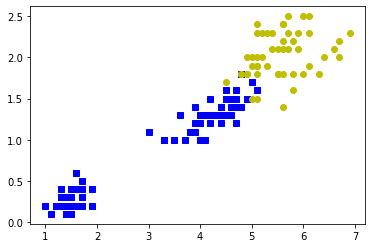

In [32]:
import matplotlib.pyplot as plt
plt.plot(X[:,0][y == 0], X[:,1][y == 0],"bs")
plt.plot(X[:,0][y == 1], X[:,1][y == 1],"yo")
plt.show()

In [37]:
from sklearn.svm import SVC
poly_kernel_scm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_scm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [41]:
from sklearn.svm import SVC
X2 = [[0, 0], [1, 1]]
y2 = [0,1]

In [42]:
clf = SVC()
clf.fit(X2, y2)
clf.predict([[2, 2]])

array([1])

In [43]:
clf.support_vectors_
#支持向量

array([[0., 0.],
       [1., 1.]])

In [46]:
clf.support_
# 支持向量的指标

array([0, 1])

In [47]:
clf.decision_function(X2)
# 决策函数计算，点到决策平面的距离

array([-0.98168436,  0.98168436])

In [48]:
# 多分类ovo，默认ovr
svm_ovo = SVC(decision_function_shape='ovo')

In [49]:
svm_ovo.fit(X,y)

SVC(decision_function_shape='ovo')

In [50]:
# 评估报告
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



+ 1. LinearSVC
- 基于liblinear库实现
- 有多种惩罚参数和损失函数可供选择
- 训练集实例数量大（大于1万）时也可以很好地进行归一化
将cache_size设置为比默认值200(MB)更高的值，例如500(MB)或1000(MB)
+ 2. 将cache_size设置为比默认值200(MB)更高的值，例如500(MB)或1000(MB)
+ 3. OneClassSVM用于异常值检测